In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.warn("Warning...........Message")


C:\Users\ACER\AppData\Local\Temp\ipykernel_17568\594819868.py:6: UserWarning: Warning...........Message
  warnings.warn("Warning...........Message")


In [ ]:
train = pd.read_csv('C://Users//ACER//Downloads//Logistic Regression//Logistic Regression//Titanic_train.csv')
test = pd.read_csv('C://Users//ACER//Downloads//Logistic Regression//Logistic Regression//Titanic_test.csv')

In [7]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [810]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [811]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [812]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [813]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [814]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [815]:
test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [816]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [817]:
train['Embarked'].fillna('s', inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\3431183060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('s', inplace=True)


In [818]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [819]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\4105841904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [820]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [821]:
(177/891)*100

19.865319865319865

In [822]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(), train['Age'].mean()+train['Age'].std(),177)

In [823]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(), test['Age'].mean()+test['Age'].std(),86)

In [824]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\4268069075.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()]=train_age
C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\4268069075.py:1: SettingWithCopyWa

In [825]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [826]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\3484201817.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Age'][test['Age'].isnull()]=test_age
C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\3484201817.py:1: SettingWithCopyWarni

In [827]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [828]:
#EDA

In [829]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [830]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [831]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
s    1.000000
Name: Survived, dtype: float64

In [832]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with


<Axes: xlabel='Age', ylabel='Density'>

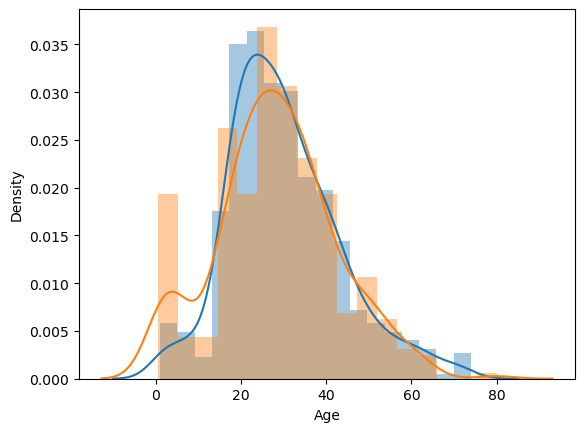

In [833]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\2626582821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\AppData\Local\Temp\ipykernel_14388\2626582821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with

<Axes: xlabel='Fare', ylabel='Density'>

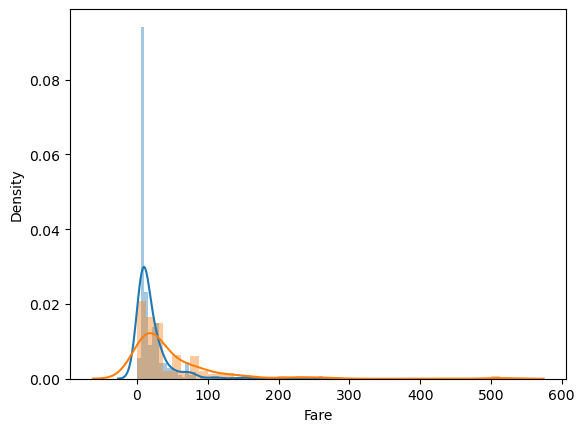

In [834]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [835]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [836]:
train.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)

In [837]:
train['family']= train['SibSp'] + train['Parch'] + 1

In [838]:
test['family']= test['SibSp'] + test['Parch'] + 1

In [839]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [840]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [841]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"
    

In [842]:
train['family_size']=train['family'].apply(cal)

In [843]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium


In [844]:
test['family_size']=test['family'].apply(cal)

In [845]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium


In [846]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=[ 'SibSp','Parch','family'], inplace=True)

In [847]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [848]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [849]:
passengerId=test['PassengerId'].values

In [850]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name', 'PassengerId'], inplace=True)

In [851]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [852]:
train


,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Alone
887,1,1,female,19.0,30.0000,S,Alone
888,0,3,female,33.0,23.4500,S,Medium
889,1,1,male,26.0,30.0000,C,Alone


In [853]:
train.shape

(891, 7)

In [854]:
train = pd.get_dummies(train, columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)

In [855]:
train 

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Embarked_s,family_size_Large,family_size_Medium
0,0,22.0,7.2500,False,True,True,False,True,False,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,True,False,True,False,True,False,False,False
887,1,19.0,30.0000,False,False,False,False,True,False,False,False
888,0,33.0,23.4500,False,True,False,False,True,False,False,True
889,1,26.0,30.0000,False,False,True,False,False,False,False,False


In [856]:
train.shape

(891, 11)

In [788]:
test.shape

(418, 6)

In [789]:
test = pd.get_dummies(test, columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)

In [790]:
test.shape

(418, 9)

In [857]:
x=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [858]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [859]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier()


In [860]:
Classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [861]:
y_pred=Classifier.predict(x_test)

In [862]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7486033519553073

In [863]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [864]:
xf=test.iloc[:,:].values

In [865]:
xf.shape

(418, 6)

In [866]:
yf=Classifier.predict(xf)

ValueError: could not convert string to float: 'male'

In [ ]:
yf.shape

In [ ]:
passengerId.shape

In [ ]:
final=pd.DataFrame()

In [ ]:
final

In [867]:
final['passengerId']=passengerId
final['survived']=yf


In [868]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# unsing pipeline 